In [60]:
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Titanic-Dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Check for null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

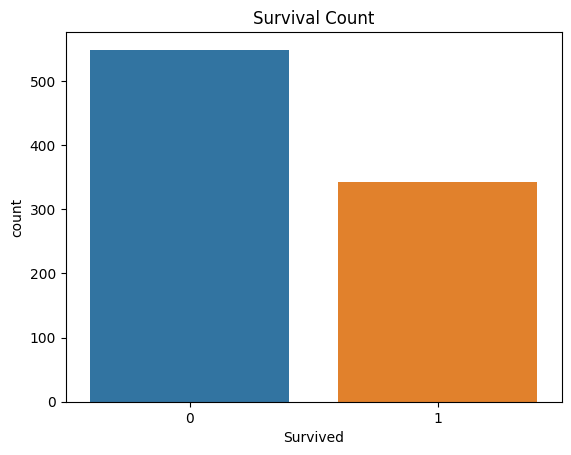

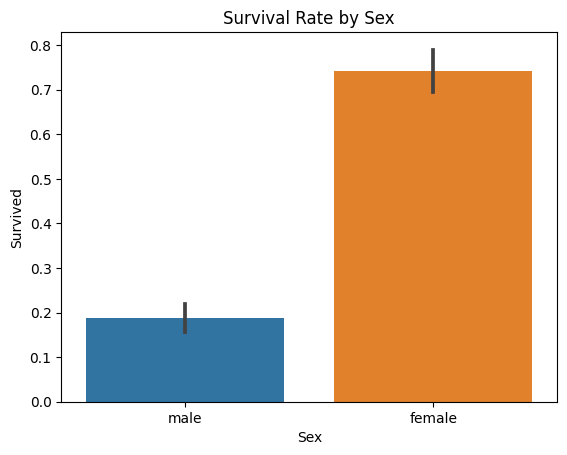

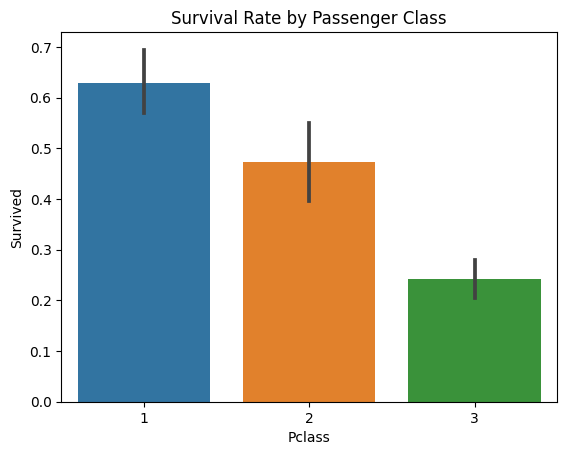

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the 'Survived' feature
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# Visualize survival rate by 'Sex'
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')
plt.show()

# Visualize survival rate by 'Pclass'
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [14]:
# Create 'FamilySize' feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Create 'IsAlone' feature
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1

# Check the new features
print(df[['SibSp', 'Parch', 'FamilySize', 'IsAlone']].head())


   SibSp  Parch  FamilySize  IsAlone
0      1      0           2        0
1      1      0           2        0
2      0      0           1        1
3      1      0           2        0
4      0      0           1        1


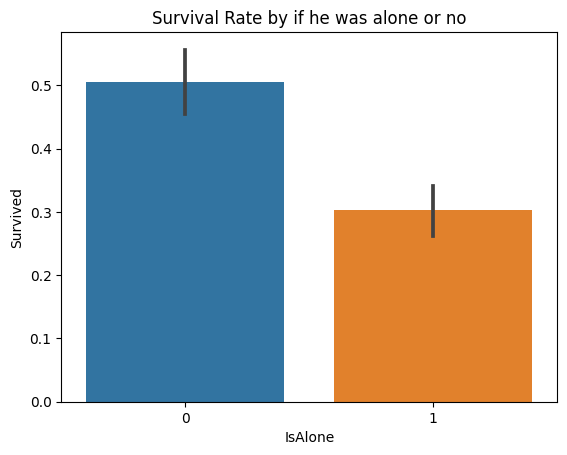

In [18]:
# Visualize survival rate by 'Pclass'
sns.barplot(x='IsAlone', y='Survived', data=df)
plt.title('Survival Rate by if he was alone or no') # 1 means he was alone and 0 means he was not
plt.show()

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1


In [19]:
df.Age.value_counts()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

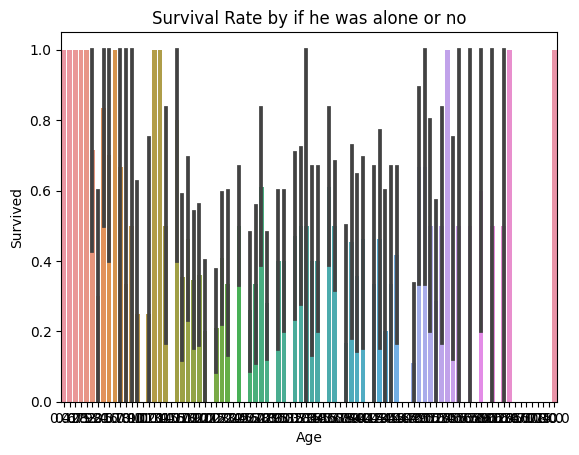

In [20]:
# Visualize survival rate by 'Pclass'
sns.barplot(x='Age', y='Survived', data=df)
plt.title('Survival Rate by if he was alone or no') # 1 means he was alone and 0 means he was not
plt.show()

In [25]:

# Filter rows with null values in the 'Age' column
null_age_rows = df[df['Age'].isnull()]

# Print the entire rows with null age values
print(null_age_rows)

     PassengerId  Survived  Pclass                                      Name   
5              6         0       3                          Moran, Mr. James  \
17            18         1       2              Williams, Mr. Charles Eugene   
19            20         1       3                   Masselmani, Mrs. Fatima   
26            27         0       3                   Emir, Mr. Farred Chehab   
28            29         1       3             O'Dwyer, Miss. Ellen "Nellie"   
..           ...       ...     ...                                       ...   
859          860         0       3                          Razi, Mr. Raihed   
863          864         0       3         Sage, Miss. Dorothy Edith "Dolly"   
868          869         0       3               van Melkebeke, Mr. Philemon   
878          879         0       3                        Laleff, Mr. Kristo   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   

        Sex  Age  SibSp  Parch      Tic

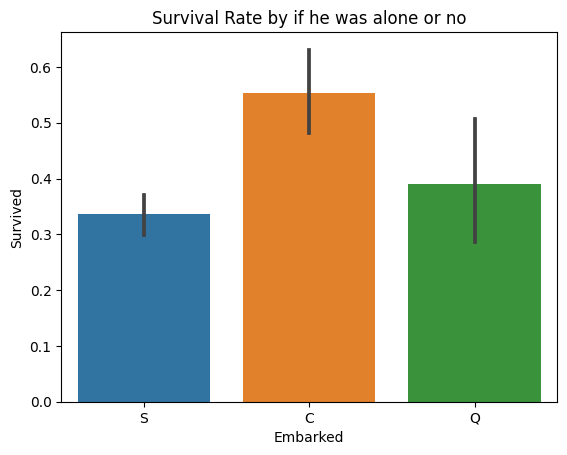

In [22]:
# Visualize survival rate by 'Pclass'
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by if he was alone or no') # 1 means he was alone and 0 means he was not
plt.show()

In [29]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000


In [30]:
df.drop('Fare', axis=1, inplace=True)

In [32]:
df.drop('Name', axis=1, inplace=True)

In [34]:
df.drop('Cabin', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)
df.drop('PassengerId', axis=1, inplace=True)

In [35]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,FamilySize,IsAlone
0,0,3,male,22.0,1,0,S,2,0
1,1,1,female,38.0,1,0,C,2,0
2,1,3,female,26.0,0,0,S,1,1
3,1,1,female,35.0,1,0,S,2,0
4,0,3,male,35.0,0,0,S,1,1


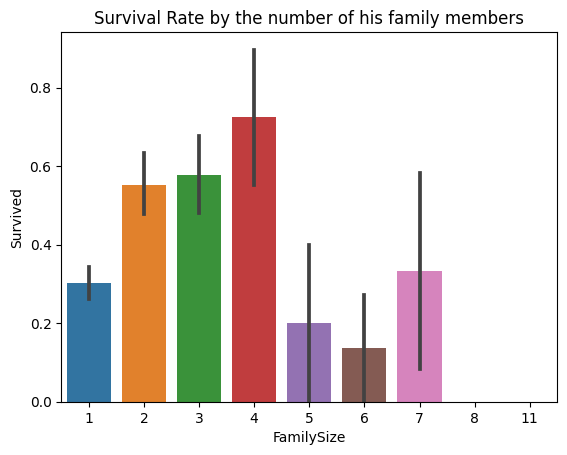

In [37]:
# Visualize survival rate by 'Pclass'
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by the number of his family members')
plt.show()

In [38]:
# Calculate the mean age
mean_age = df['Age'].mean()

# Fill missing 'Age' values with the mean age
df['Age'].fillna(mean_age, inplace=True)

# Verify that there are no more missing values in the 'Age' column
print(df['Age'].isnull().sum())

0


In [39]:
# Encode categorical variables ('Sex' and 'Embarked')
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [40]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,2,0,False,True,False,False,True
1,1,1,38.0,1,0,2,0,True,False,True,False,False
2,1,3,26.0,0,0,1,1,True,False,False,False,True
3,1,1,35.0,1,0,2,0,True,False,False,False,True
4,0,3,35.0,0,0,1,1,False,True,False,False,True


In [74]:
# Select features and target variable
X = df[['Pclass', 'Age', 'SibSp', 'Parch','FamilySize', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']]
y = df['Survived']

In [75]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/Users/marwan/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [78]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


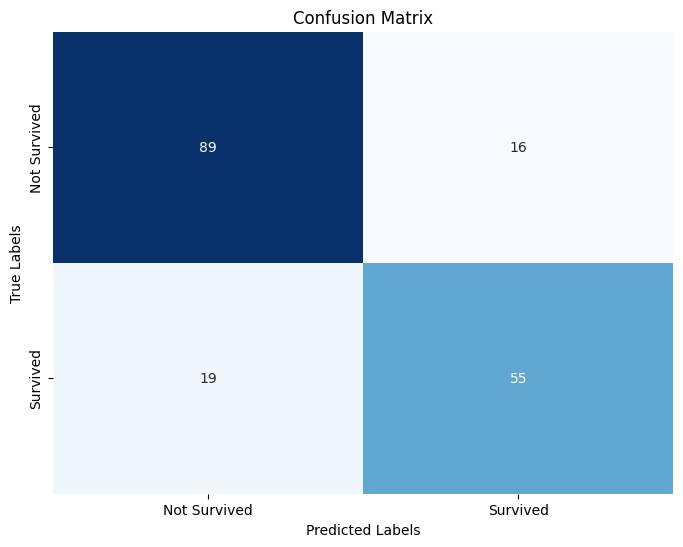

In [79]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [80]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8156424581005587


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200,300,400,25],
    'max_depth': [None, 10, 20,5,30,40,50],
    'min_samples_split': [2,3,4, 5, 10,12,15],
    'min_samples_leaf': [1, 2, 4,3,5,6,7,8,9,10]
}

# Initialize the Random Forest classifier
rf_model2 = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_model2 = RandomForestClassifier(**best_params, random_state=42)
best_rf_model2.fit(X_train, y_train)

# Make predictions on the test set using the best model
y_pred_best_rf2 = best_rf_model2.predict(X_test)

# Evaluate the model's performance
accuracy_best_rf2 = accuracy_score(y_test, y_pred_best_rf2)
print("Best Random Forest Accuracy:", accuracy_best_rf2)
